# Support Vector Regression (SVR)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Import Data

In [2]:
df = pd.read_csv('Datasets/Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [3]:
y = y.reshape(-1, 1)

##  Feature Scaling

In [4]:
myScalerX = StandardScaler()
X = myScalerX.fit_transform(X)
myScalery = StandardScaler()
y = myScalery.fit_transform(y)

In [5]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR 

In [7]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\patri\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a New Result

In [15]:
yHat = myScalery.inverse_transform(regressor.predict(myScalerX.transform([[6.5]])).reshape(-1, 1))
print(yHat)

[[170370.0204065]]


## Visualising SVR Results

Text(0, 0.5, 'Salary')

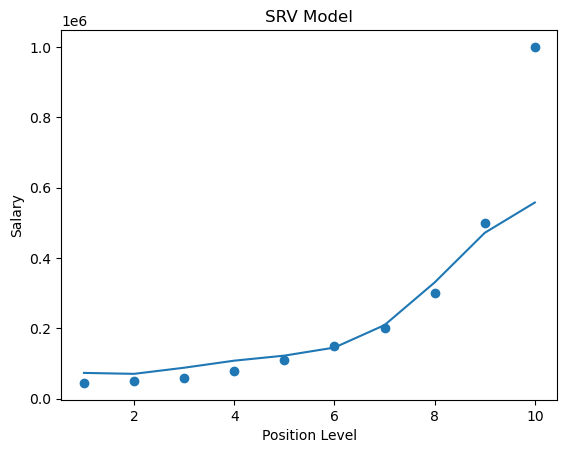

In [33]:
plt.scatter(myScalerX.inverse_transform(X), myScalery.inverse_transform(y))
plt.plot(myScalerX.inverse_transform(X), myScalery.inverse_transform(regressor.predict(X).reshape(-1, 1)))
plt.title("SRV Model")
plt.xlabel("Position Level")
plt.ylabel("Salary")

## High Res Version

Text(0, 0.5, 'Salary 1000s £')

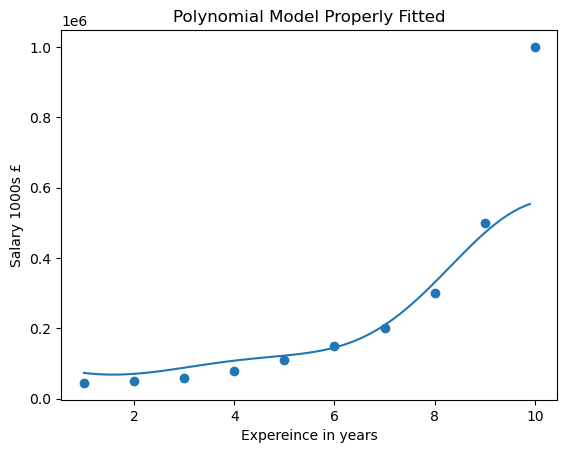

In [39]:
# Same graph but attempting to smoothen it out.
X_data = np.arange(min(myScalerX.inverse_transform(X)), max(myScalerX.inverse_transform(X)), 0.1)
X_data = X_data.reshape(-1, 1)
plt.scatter(myScalerX.inverse_transform(X), myScalery.inverse_transform(y))
plt.plot(X_data, myScalery.inverse_transform(regressor.predict(myScalerX.transform(X_data)).reshape(-1, 1)))
plt.title('Polynomial Model Properly Fitted')
plt.xlabel('Expereince in years')
plt.ylabel('Salary 1000s £')